In [43]:
# Dependencies
import numpy as np
import pandas as pd

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

# Matplotlib for charting
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

# Analysis Prep: Reflect & Explore dbases

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [13]:
# Print all of the classes (tables) mapped to the Base
Base.classes.keys()

['measurement', 'station']

In [16]:
# Create the inspector and connect it to the engine
inspector = inspect(engine)

In [20]:
# Use the inspector to print the column names within the 'measurement' table and its types
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [26]:
engine.execute('SELECT * FROM measurement LIMIT 5').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

In [29]:
# Earliest Date
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01',)

In [30]:
# Latest Date
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [21]:
# Use the inspector to print the column names within the 'station' table and its types
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [27]:
engine.execute('SELECT * FROM station LIMIT 5').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [33]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract
import datetime as dt

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 

# Query for all dates with following date string in the format `%m` for month of June
date_str = "06"
session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == date_str).all()




[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [34]:
#  3. Convert the June temperatures to a list.
results = []
results = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == date_str).all()

In [35]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
df = pd.DataFrame(results, columns=['date','temperature'])
df.set_index(df['date'], inplace=True)
print(df.to_string(index=False))

      date  temperature
2010-06-01         78.0
2010-06-02         76.0
2010-06-03         78.0
2010-06-04         76.0
2010-06-05         77.0
2010-06-06         78.0
2010-06-07         77.0
2010-06-08         78.0
2010-06-09         78.0
2010-06-10         79.0
2010-06-11         78.0
2010-06-12         78.0
2010-06-13         78.0
2010-06-14         77.0
2010-06-15         78.0
2010-06-16         78.0
2010-06-17         77.0
2010-06-18         77.0
2010-06-19         82.0
2010-06-20         78.0
2010-06-21         78.0
2010-06-22         78.0
2010-06-23         78.0
2010-06-24         78.0
2010-06-25         77.0
2010-06-26         76.0
2010-06-27         78.0
2010-06-28         78.0
2010-06-29         78.0
2010-06-30         78.0
2011-06-01         77.0
2011-06-02         78.0
2011-06-03         73.0
2011-06-04         70.0
2011-06-05         76.0
2011-06-06         77.0
2011-06-07         77.0
2011-06-08         77.0
2011-06-09         77.0
2011-06-10         78.0
2011-06-11      

In [36]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
df.describe()

,temperature
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [37]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.

# Query for all dates with following date string in the format `%m` for month of December
date_str = "12"
session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == date_str).all()

[('2010-12-01', 76.0),
 ('2010-12-03', 74.0),
 ('2010-12-04', 74.0),
 ('2010-12-06', 64.0),
 ('2010-12-07', 64.0),
 ('2010-12-08', 67.0),
 ('2010-12-09', 77.0),
 ('2010-12-10', 66.0),
 ('2010-12-11', 69.0),
 ('2010-12-12', 68.0),
 ('2010-12-13', 68.0),
 ('2010-12-14', 71.0),
 ('2010-12-15', 74.0),
 ('2010-12-16', 67.0),
 ('2010-12-17', 66.0),
 ('2010-12-18', 69.0),
 ('2010-12-19', 71.0),
 ('2010-12-23', 70.0),
 ('2010-12-24', 70.0),
 ('2010-12-26', 74.0),
 ('2010-12-27', 74.0),
 ('2010-12-28', 71.0),
 ('2010-12-29', 75.0),
 ('2010-12-30', 75.0),
 ('2010-12-31', 72.0),
 ('2011-12-01', 69.0),
 ('2011-12-02', 68.0),
 ('2011-12-03', 73.0),
 ('2011-12-04', 74.0),
 ('2011-12-05', 73.0),
 ('2011-12-06', 73.0),
 ('2011-12-07', 73.0),
 ('2011-12-08', 73.0),
 ('2011-12-09', 71.0),
 ('2011-12-10', 73.0),
 ('2011-12-11', 73.0),
 ('2011-12-12', 77.0),
 ('2011-12-13', 72.0),
 ('2011-12-14', 71.0),
 ('2011-12-15', 73.0),
 ('2011-12-16', 70.0),
 ('2011-12-17', 73.0),
 ('2011-12-18', 69.0),
 ('2011-12-

In [38]:
# 7. Convert the December temperatures to a list.
results = []
results = session.query(Measurement.date, Measurement.tobs).\
    filter(func.strftime("%m", Measurement.date) == date_str).all()

In [39]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
df = pd.DataFrame(results, columns=['date','temperature'])
df.set_index(df['date'], inplace=True)
print(df.to_string(index=False))

      date  temperature
2010-12-01         76.0
2010-12-03         74.0
2010-12-04         74.0
2010-12-06         64.0
2010-12-07         64.0
2010-12-08         67.0
2010-12-09         77.0
2010-12-10         66.0
2010-12-11         69.0
2010-12-12         68.0
2010-12-13         68.0
2010-12-14         71.0
2010-12-15         74.0
2010-12-16         67.0
2010-12-17         66.0
2010-12-18         69.0
2010-12-19         71.0
2010-12-23         70.0
2010-12-24         70.0
2010-12-26         74.0
2010-12-27         74.0
2010-12-28         71.0
2010-12-29         75.0
2010-12-30         75.0
2010-12-31         72.0
2011-12-01         69.0
2011-12-02         68.0
2011-12-03         73.0
2011-12-04         74.0
2011-12-05         73.0
2011-12-06         73.0
2011-12-07         73.0
2011-12-08         73.0
2011-12-09         71.0
2011-12-10         73.0
2011-12-11         73.0
2011-12-12         77.0
2011-12-13         72.0
2011-12-14         71.0
2011-12-15         73.0
2011-12-16      

In [40]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
df.describe()

,temperature
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


# Additional Analysis for Summary

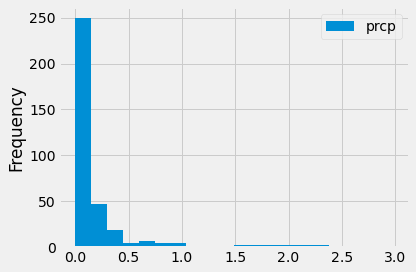

In [45]:
# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Using the same station used for temperature observations to...
# Query the last 12 months of precipitation observation data and plot the results as a histogram
results = session.query(Measurement.prcp).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()

# create dataframe from results
df = pd.DataFrame(results, columns=['prcp'])

# plot past year precipitation in a histogram
df.plot.hist(bins=20)
plt.tight_layout()

In [51]:
# Query for all dates with following date string in the format `%m` for month of June
date_str = "06"
session.query(Measurement.date, Measurement.prcp).\
    filter(func.strftime("%m", Measurement.date) == date_str).all()

[('2010-06-01', 0.0),
 ('2010-06-02', 0.01),
 ('2010-06-03', 0.0),
 ('2010-06-04', 0.0),
 ('2010-06-05', 0.0),
 ('2010-06-06', 0.0),
 ('2010-06-07', 0.0),
 ('2010-06-08', 0.0),
 ('2010-06-09', 0.0),
 ('2010-06-10', 0.0),
 ('2010-06-11', 0.0),
 ('2010-06-12', 0.0),
 ('2010-06-13', 0.0),
 ('2010-06-14', 0.0),
 ('2010-06-15', 0.0),
 ('2010-06-16', 0.0),
 ('2010-06-17', 0.0),
 ('2010-06-18', 0.0),
 ('2010-06-19', 0.0),
 ('2010-06-20', 0.0),
 ('2010-06-21', 0.0),
 ('2010-06-22', 0.0),
 ('2010-06-23', 0.0),
 ('2010-06-24', 0.0),
 ('2010-06-25', 0.0),
 ('2010-06-26', 0.02),
 ('2010-06-27', 0.0),
 ('2010-06-28', 0.0),
 ('2010-06-29', 0.0),
 ('2010-06-30', 0.0),
 ('2011-06-01', 0.07),
 ('2011-06-02', 0.0),
 ('2011-06-03', 0.56),
 ('2011-06-04', 0.89),
 ('2011-06-05', 0.0),
 ('2011-06-06', 0.0),
 ('2011-06-07', 0.0),
 ('2011-06-08', 0.03),
 ('2011-06-09', 0.01),
 ('2011-06-10', 0.0),
 ('2011-06-11', 0.0),
 ('2011-06-12', 0.0),
 ('2011-06-13', 0.0),
 ('2011-06-14', 0.0),
 ('2011-06-15', 0.0),
 ('

In [52]:
# Convert the June precipitation to a list.
results = []
results = session.query(Measurement.date, Measurement.prcp).\
    filter(func.strftime("%m", Measurement.date) == date_str).all()

In [53]:
# Create a DataFrame from the list of precipitation for the month of June. 
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
print(df.to_string(index=False))

      date  precipitation
2010-06-01           0.00
2010-06-02           0.01
2010-06-03           0.00
2010-06-04           0.00
2010-06-05           0.00
2010-06-06           0.00
2010-06-07           0.00
2010-06-08           0.00
2010-06-09           0.00
2010-06-10           0.00
2010-06-11           0.00
2010-06-12           0.00
2010-06-13           0.00
2010-06-14           0.00
2010-06-15           0.00
2010-06-16           0.00
2010-06-17           0.00
2010-06-18           0.00
2010-06-19           0.00
2010-06-20           0.00
2010-06-21           0.00
2010-06-22           0.00
2010-06-23           0.00
2010-06-24           0.00
2010-06-25           0.00
2010-06-26           0.02
2010-06-27           0.00
2010-06-28           0.00
2010-06-29           0.00
2010-06-30           0.00
2011-06-01           0.07
2011-06-02           0.00
2011-06-03           0.56
2011-06-04           0.89
2011-06-05           0.00
2011-06-06           0.00
2011-06-07           0.00
2011-06-08  

In [54]:
# Calculate and print out the summary statistics for the June precipitation DataFrame.
df.describe()

,precipitation
count,1574.000000
mean,0.136360
std,0.335731
min,0.000000
25%,0.000000
50%,0.020000
75%,0.120000
max,4.430000


In [55]:
# Query for all dates with following date string in the format `%m` for month of December
date_str = "12"
session.query(Measurement.date, Measurement.prcp).\
    filter(func.strftime("%m", Measurement.date) == date_str).all()

[('2010-12-01', 0.04),
 ('2010-12-03', 0.0),
 ('2010-12-04', 0.0),
 ('2010-12-06', 0.0),
 ('2010-12-07', 0.0),
 ('2010-12-08', 0.0),
 ('2010-12-09', 0.0),
 ('2010-12-10', 1.58),
 ('2010-12-11', 0.77),
 ('2010-12-12', 0.0),
 ('2010-12-13', 0.0),
 ('2010-12-14', 0.0),
 ('2010-12-15', 0.0),
 ('2010-12-16', 0.0),
 ('2010-12-17', 0.0),
 ('2010-12-18', 0.0),
 ('2010-12-19', 1.4),
 ('2010-12-23', 0.0),
 ('2010-12-24', 0.0),
 ('2010-12-26', None),
 ('2010-12-27', 0.13),
 ('2010-12-28', 0.55),
 ('2010-12-29', 0.06),
 ('2010-12-30', 0.01),
 ('2010-12-31', 0.0),
 ('2011-12-01', 0.03),
 ('2011-12-02', 0.08),
 ('2011-12-03', 0.0),
 ('2011-12-04', 0.0),
 ('2011-12-05', 0.0),
 ('2011-12-06', 0.0),
 ('2011-12-07', 0.0),
 ('2011-12-08', 0.0),
 ('2011-12-09', 0.13),
 ('2011-12-10', 0.07),
 ('2011-12-11', 0.07),
 ('2011-12-12', 0.08),
 ('2011-12-13', 0.4),
 ('2011-12-14', 0.7),
 ('2011-12-15', 0.0),
 ('2011-12-16', 0.01),
 ('2011-12-17', 0.07),
 ('2011-12-18', 0.02),
 ('2011-12-19', 0.15),
 ('2011-12-20'

In [56]:
# Convert the December precipitation to a list.
results = []
results = session.query(Measurement.date, Measurement.prcp).\
    filter(func.strftime("%m", Measurement.date) == date_str).all()

In [57]:
# Create a DataFrame from the list of precipitation for the month of December. 
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
print(df.to_string(index=False))

      date  precipitation
2010-12-01           0.04
2010-12-03           0.00
2010-12-04           0.00
2010-12-06           0.00
2010-12-07           0.00
2010-12-08           0.00
2010-12-09           0.00
2010-12-10           1.58
2010-12-11           0.77
2010-12-12           0.00
2010-12-13           0.00
2010-12-14           0.00
2010-12-15           0.00
2010-12-16           0.00
2010-12-17           0.00
2010-12-18           0.00
2010-12-19           1.40
2010-12-23           0.00
2010-12-24           0.00
2010-12-26            NaN
2010-12-27           0.13
2010-12-28           0.55
2010-12-29           0.06
2010-12-30           0.01
2010-12-31           0.00
2011-12-01           0.03
2011-12-02           0.08
2011-12-03           0.00
2011-12-04           0.00
2011-12-05           0.00
2011-12-06           0.00
2011-12-07           0.00
2011-12-08           0.00
2011-12-09           0.13
2011-12-10           0.07
2011-12-11           0.07
2011-12-12           0.08
2011-12-13  

In [58]:
# Calculate and print out the summary statistics for the December precipitation DataFrame.
df.describe()

,precipitation
count,1405.000000
mean,0.216819
std,0.541399
min,0.000000
25%,0.000000
50%,0.030000
75%,0.150000
max,6.420000
